In [1]:
import turicreate as tc

In [2]:
data =  tc.SFrame('train_balanced.csv')

Finished parsing file /root/notebooks/ML_GEO data/metadata-unsupervised-assessment/train_balanced.csv

Parsing completed. Parsed 100 lines in 0.026676 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,int,int,int,int,int,int,int,int,int,int,int,int,int,int,float,float,float,int,float,int,int,float,int,int,float,int,int,int,int,int,int,int,int,int,int,float,float,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /root/notebooks/ML_GEO data/metadata-unsupervised-assessment/train_balanced.csv

Parsing completed. Parsed 647 lines in 0.02684 secs.

In [3]:
data.head()

key,KEY CLASS,age,(years),diagnosis,gestational,(yrs),culture,onset,(in
# of tissue = 36 tissue,no,0.0,0,0,0,0,0,0,0
4 months tissue,no,0.0,0,0,0,0,0,0,0
prostate tissue,no,0.0,0,0,0,0,0,0,0
# of tissue = 1 tissue,no,0.0,0,0,0,0,0,0,0
# of tissue = 40 tissue,no,0.0,0,0,0,0,0,0,0
# of tissue = 42 tissue,no,0.0,0,0,0,0,0,0,0
fetal vs adult tissue,no,0.0,0,0,0,0,0,0,0
# of tissue = 38 tissue,no,0.0,0,0,0,0,0,0,0
a.thaliana tissue,no,0.0,0,0,0,0,0,0,0
age of ffpe tissue,no,3.381583576,0,0,0,0,0,0,0


In [4]:
train_data, test_data = data.random_split(0.8)

In [5]:
model = tc.logistic_classifier.create(train_data, target = 'KEY CLASS', features = ['age', '(years)', 'diagnosis', 
                                                                                   'gestational', '(yrs)', 'culture', 'onset',
                                                                                   '(in', 'surgery', 'death', 'time', 'days', 
                                                                                   '(months)', 'diet', 'blood', 'tissue',
                                                                                   'sample', 'group', 'sampling', 'donor', 
                                                                                    'day)', 'birth)', 'treatment', 'draw', 
                                                                                    'maternal', 'cell', 'start', '(y)', '(yr)',
                                                                                   '(year)', 'patient', 'experiment', '(range)',
                                                                                   'withdrawal', '(days)', 'ffpe', 'pig',
                                                                                   'years', 'weeks,', 'days,', 'week', 'hours',
                                                                                   'old', 'day', '76', '3', '68', '66', '67',
                                                                                   '28', '56', '2', '8', '19', '61', '54', '57',
                                                                                   '5', '49', '39', '64', '69', '58', '53', '30',
                                                                                   '17', '59', '26', '73', '48', '38', '24',
                                                                                   '55', '43', '11', '71', '78'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'experiment' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 510

Number of classes           : 2

Number of feature columns   : 77

Number of unpacked features : 77

Number of coefficients      : 78

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.010710     | 0.982353          | 1.000000            |

| 2         | 3        | 1.014395     | 0.982353          | 1.000000            |

| 3         | 4        | 1.022021     | 0.998039          | 1.000000            |

| 4         | 5        | 1.039492     | 0.998039          | 1.000000            |

| 5         | 6        | 1.048269     | 0.998039          | 1.000000            |

| 6         | 7        | 1.058311     | 0.998039          | 1.000000            |

+-----------+----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [6]:
model

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 78
Number of examples             : 510
Number of classes              : 2
Number of feature columns      : 77
Number of unpacked features    : 77

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 10
Solver status                  : TERMINATED: Iteration limit reached.
Training time (sec)            : 1.0815

Settings
--------
Log-likelihood                 : 4.2317

Highest Positive Coefficients
-----------------------------
tissue                         : 7.6408
(intercept)                    : 7.3682
donor                          : 1.5174
maternal                       : 1.4685
ffpe                           : 1.4626

Lowest Negative Coefficients
----------------------------
old                            : -5.1605
3   

In [7]:
# Make predictions and evaluate results.
ev_train = model.evaluate(train_data)

In [8]:
ev_train

{'accuracy': 0.9981203007518797,
 'auc': 0.9998571979379376,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     age      |       age       |  239  |
 |      no      |       age       |   1   |
 |      no      |        no       |  292  |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.9982905982905983,
 'log_loss': 0.00798416940258571,
 'precision': 1.0,
 'recall': 0.9965870307167235,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+----------------+-----+-----+-----+
 | threshold |      fpr       | tpr |  p  |  n  |
 +-----------+----------------+-----+-----+-----+
 |    0.0    |      1.0       | 1.0 | 293 | 239 |
 |   1e-05   | 0.468619246862 | 1.0 | 293 | 239 |
 |   2e-05   | 0.414225941423 | 

In [9]:
ev_test = model.evaluate(test_data)

In [10]:
ev_test

{'accuracy': 1.0, 'auc': 1.0000000000000004, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     age      |       age       |   56  |
 |      no      |        no       |   59  |
 +--------------+-----------------+-------+
 [2 rows x 3 columns], 'f1_score': 1.0, 'log_loss': 0.0028271894002398403, 'precision': 1.0, 'recall': 1.0, 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+----------------+-----+----+----+
 | threshold |      fpr       | tpr | p  | n  |
 +-----------+----------------+-----+----+----+
 |    0.0    |      1.0       | 1.0 | 59 | 56 |
 |   1e-05   | 0.303571428571 | 1.0 | 59 | 56 |
 |   2e-05   | 0.285714285714 | 1.0 | 59 | 56 |
 |   3e-05   | 0.267857142857 | 1.0 | 59 | 56 |
 |   4e-05   | 0.267857142857 | 1.0 | 59

In [11]:
ev_test.items()

[('f1_score', 1.0),
 ('auc', 1.0000000000000004),
 ('recall', 1.0),
 ('precision', 1.0),
 ('log_loss', 0.0028271894002398403),
 ('roc_curve', Columns:
  	threshold	float
  	fpr	float
  	tpr	float
  	p	int
  	n	int
  
  Rows: 100001
  
  Data:
  +-----------+----------------+-----+----+----+
  | threshold |      fpr       | tpr | p  | n  |
  +-----------+----------------+-----+----+----+
  |    0.0    |      1.0       | 1.0 | 59 | 56 |
  |   1e-05   | 0.303571428571 | 1.0 | 59 | 56 |
  |   2e-05   | 0.285714285714 | 1.0 | 59 | 56 |
  |   3e-05   | 0.267857142857 | 1.0 | 59 | 56 |
  |   4e-05   | 0.267857142857 | 1.0 | 59 | 56 |
  |   5e-05   |      0.25      | 1.0 | 59 | 56 |
  |   6e-05   |      0.25      | 1.0 | 59 | 56 |
  |   7e-05   |      0.25      | 1.0 | 59 | 56 |
  |   8e-05   |      0.25      | 1.0 | 59 | 56 |
  |   9e-05   |      0.25      | 1.0 | 59 | 56 |
  +-----------+----------------+-----+----+----+
  [100001 rows x 5 columns]
  Note: Only the head of the SFrame is prin

In [12]:
model.predict(test_data)

dtype: str
Rows: 115
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'age', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', ... ]

In [13]:
#ev_test.items()
ev_test['auc']

1.0000000000000004

In [14]:
roc_curve_table = ev_test['roc_curve']

In [15]:
roc_curve_table

threshold,fpr,tpr,p,n
0.0,1.0,1.0,59,56
1e-05,0.303571428571,1.0,59,56
2e-05,0.285714285714,1.0,59,56
3e-05,0.267857142857,1.0,59,56
4e-05,0.267857142857,1.0,59,56
5e-05,0.25,1.0,59,56
6e-05,0.25,1.0,59,56
7e-05,0.25,1.0,59,56
8e-05,0.25,1.0,59,56
9e-05,0.25,1.0,59,56


In [16]:
import matplotlib.pyplot as plt

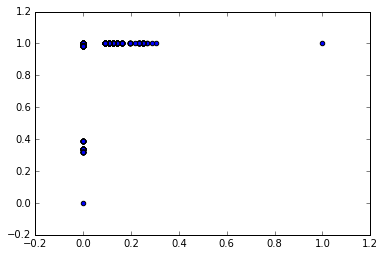

In [17]:
plt.scatter(roc_curve_table['fpr'], roc_curve_table['tpr'])

In [18]:
#predictions.export_csv('test_pred_all_log_reg.csv')

In [19]:
ev_train['auc']

0.9998571979379376

In [20]:
roc_curve_train = ev_train['roc_curve']

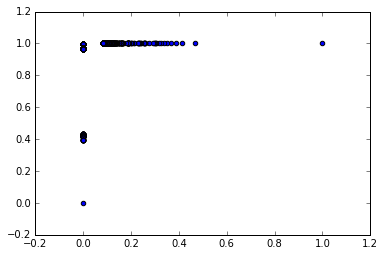

In [21]:
plt.scatter(roc_curve_train['fpr'],roc_curve_train['tpr'])

In [28]:
test_data.export_csv('test_data_bal.csv')

In [29]:
predictions = model.classify(test_data)

In [30]:
predictions.export_csv('predictions_bal.csv')

In [32]:
train_data.export_csv('train_balance.csv')

In [33]:
pred_train = model.classify(train_data)

In [34]:
pred_train.export_csv('train_pred_bal.csv')